### 02_analysis_python.ipynb – Business Insights and Visualization (WSDA_Music)

# 🧠 Objective

In this notebook, we move from structural exploration to business-driven analysis.
We will use SQL queries via Python and transform the data with Pandas to answer key business questions:

1. What are the total revenues by music genre?
2. Who are the top 10 customers by total spending?
3. Which artists have the most tracks in the store?
4. Are some countries generating more revenue than others?
5. How is monthly revenue trending over time?

Visualizations will be created using Matplotlib, Seaborn, or Plotly.

# ✅ Setup

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Connect to the database
db_path = Path("../data/WSDA_Music.db")
conn = sqlite3.connect(db_path)


# 📊 1. Revenue by Genre

In [7]:
query_genre_revenue = """
SELECT g.name AS genre, ROUND(SUM(il.unitprice * il.quantity), 2) AS total_revenue
FROM invoiceline il
JOIN track t ON il.trackid = t.trackid
JOIN genre g ON t.genreid = g.genreid
GROUP BY g.name
ORDER BY total_revenue DESC;
"""


genre_revenue = pd.read_sql(query_genre_revenue, conn)

In [ ]:
# In order to save charts to /images
dst = Path("../images")
dst.mkdir(exist_ok=True)

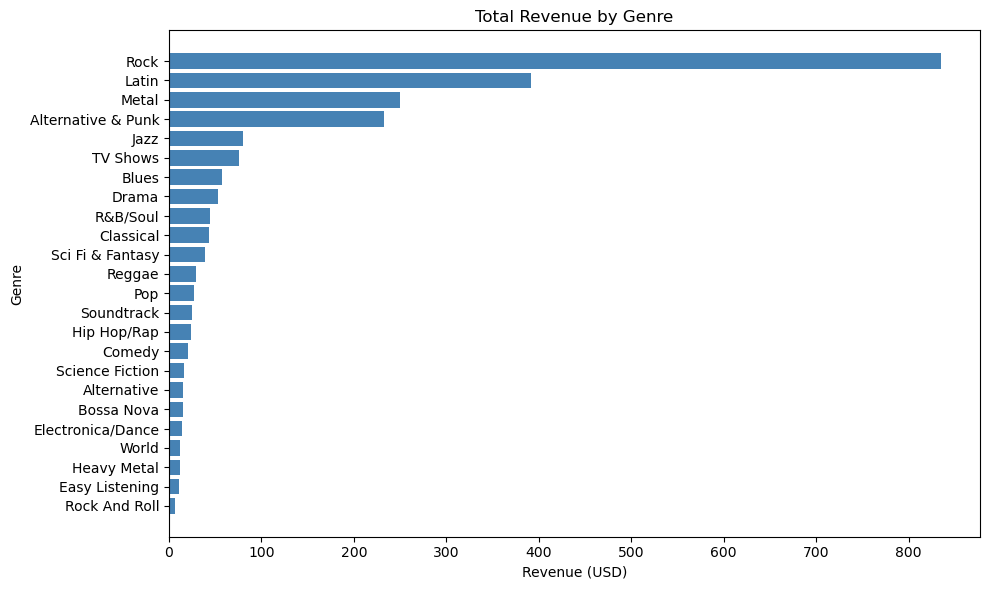

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(genre_revenue['genre'], genre_revenue['total_revenue'], color='steelblue')
plt.title("Total Revenue by Genre")
plt.xlabel("Revenue (USD)")
plt.ylabel("Genre")
plt.gca().invert_yaxis()  # To display highest revenue on top
plt.tight_layout()
plt.savefig(dst / "total_revenue_by_genre.png")
plt.show()


# 👣 Next Steps
- Repeat similar structure for:
  - Top 10 customers by spending
  - Artists with most tracks
  - Revenue by country
  - Monthly revenue trends
- Save all charts in /images for README.md

# ✅ 2. Top 10 Customers by Spending

In [13]:
query_top_customers = """
SELECT c.firstname || ' ' || c.lastname AS customer_name,
       ROUND(SUM(il.unitprice * il.quantity), 2) AS total_spent
FROM invoiceline il
JOIN invoice i ON il.invoiceid = i.invoiceid
JOIN customer c ON i.customerid = c.customerid
GROUP BY customer_name
ORDER BY total_spent DESC
LIMIT 10;
"""

top_customers = pd.read_sql(query_top_customers, conn)

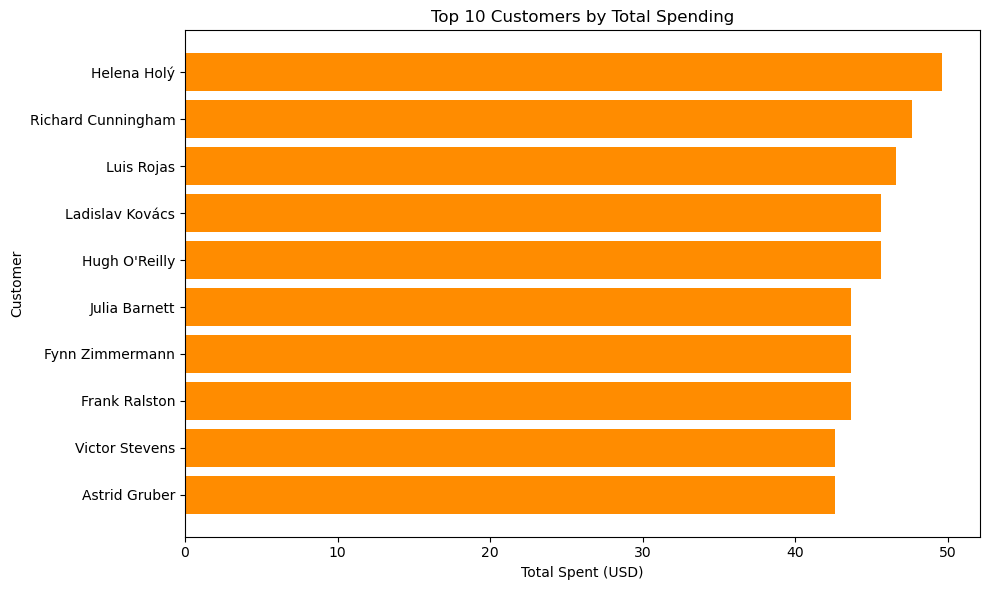

In [14]:
plt.figure(figsize=(10,6))
plt.barh(top_customers['customer_name'], top_customers['total_spent'], color='darkorange')
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spent (USD)")
plt.ylabel("Customer")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(dst / "top_customers.png")
plt.show()
